In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [419]:
from google.colab import files
uploaded = files.upload()

Saving Human_Development_Index_Dataset.csv to Human_Development_Index_Dataset (4).csv


Problem 1 A :

1. Extract Latest Year:

In [420]:
# Load dataset
df = pd.read_csv("Human_Development_Index_Dataset.csv",encoding='ISO-8859-1')

# Check unique years
print("unique years: ", df['year'].unique())


unique years:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [421]:
hdi_2022_df = df[df['year'].isin([2020, 2021, 2022])]
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi', 'country', 'year'])
hdi_2022_df = hdi_2022_df.drop_duplicates()


2. Data Exploration:

In [422]:
# First 10 rows
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
96,97,DZA,Algeria,2020,0.730,74.453,43.451666,0.666724,0.758643,75.912,73.082,15.302207,15.999701,14.634753,6.987444,6.490568,7.481537,10634.883980,3709.098381,17305.912600,0.879,0.396,42.910456,46.815170,21.061360,78.938640,17.53,65.59,3.909926,8.7299
97,98,DZA,Algeria,2021,0.740,76.377,44.177968,0.677675,0.768169,77.959,74.879,15.395043,16.131940,14.689317,6.987444,6.490568,7.481537,10823.118130,3786.828917,17604.030850,0.882,0.457,42.910456,46.815170,7.481752,92.518248,17.57,65.53,4.079540,8.6074
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
129,130,AND,Andorra,2020,0.843,79.023,0.077700,NaN,NaN,83.192,75.763,11.911930,11.877110,11.944830,11.260993,11.178576,11.343280,48026.390490,NaN,NaN,NaN,NaN,78.306798,80.787392,46.428571,53.571429,NaN,NaN,4.809910,NaN


In [423]:
# Rows and columns
hdi_2022_df.shape


(610, 30)

In [424]:
#Column names & data types
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 610 non-null    int64  
 1   iso3                       610 non-null    object 
 2   country                    610 non-null    object 
 3   year                       610 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            610 non-null    float64
 6   pop_millions               610 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               610 non-null    float64
 10  life_expec_m               610 non-null    float64
 11  expec_yr_school            610 non-null    float64
 12  expec_yr_school_f          610 non-null    float64
 13  expec_yr_school_m          610 non-null    float64
 1

3. Missing Values & Data Cleaning:

In [425]:
hdi_2022_df.isna().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,33
hdi_m,33
life_expec_f,0


In [426]:
# Replace special characters like "–"
hdi_2022_df.replace("–", np.nan, inplace=True)

# Convert numeric columns safely
numeric_cols = ['hdi', 'gross inc percap', 'life expectancy', 'gender development']

for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')


In [427]:
hdi_2022_df.drop_duplicates(inplace=True)


In [428]:
hdi_2022_df.dropna(subset=['hdi'], inplace=True)


4. Basic Statistics:

In [429]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7212770491803279), 0.7375, 0.15024865093525108)

In [430]:
# Highest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]


,5609
Unnamed: 0,5610
iso3,CHE
country,Switzerland
year,2022
hdi,0.967
life_expectancy,84.255
pop_millions,8.740472
hdi_f,0.949369
hdi_m,0.977383
life_expec_f,85.932


In [431]:
# Lowest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]


,5345
Unnamed: 0,5346
iso3,SOM
country,Somalia
year,2022
hdi,0.38
life_expectancy,56.107
pop_millions,17.597511
hdi_f,0.327083
hdi_m,0.425211
life_expec_f,58.233


5. Filtering and Sorting:

In [432]:
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

top10_gni = high_hdi.sort_values(
    by='gross_inc_percap',
    ascending=False
).head(10)

top10_gni


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,83.019,15.466400,14.518240,16.434999,12.351169,12.090864,14.049712,146673.24150,114828.83430,179045.06860,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
3331,3332,LIE,Liechtenstein,2021,0.936,83.257,0.039039,0.920376,0.967255,85.350,81.101,15.466400,14.518240,16.434999,12.351169,12.090864,14.049712,144002.98760,112746.33540,175796.64020,0.952,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
3330,3331,LIE,Liechtenstein,2020,0.933,82.797,0.038756,0.916898,0.966021,85.006,80.565,15.458630,14.348350,16.589661,12.351169,12.090864,14.049712,138481.37120,108379.26230,169070.50080,0.949,NaN,NaN,NaN,12.000000,88.000000,52.82,67.36,3.662143,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,95944.37754,47963.67663,114134.84230,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
4717,4718,QAT,Qatar,2021,0.864,79.272,2.688235,0.875835,0.858358,80.937,78.314,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,91760.27693,42345.17450,110339.82140,1.020,0.216,81.832741,71.417976,4.444444,95.555556,59.60,95.41,39.884274,60.4693
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88761.14559,76610.86780,99844.23650,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
5212,5213,SGP,Singapore,2021,0.942,82.754,5.941060,0.938519,0.947397,84.927,80.636,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88518.78332,82518.16772,93990.43544,0.991,0.037,80.464020,85.932037,29.807692,70.192308,64.17,77.16,9.397481,43.4793
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,19.126101,19.475800,18.771580,11.656957,11.863226,11.437631,87467.51391,66876.42142,108423.61080,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
4716,4717,QAT,Qatar,2020,0.863,79.099,2.760385,0.873809,0.857939,80.679,78.225,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,87384.90760,41704.72718,104582.66640,1.018,0.168,81.832741,71.417976,9.756098,90.243902,58.40,95.75,37.132936,59.4577
5211,5212,SGP,Singapore,2020,0.942,82.861,5.909870,0.939358,0.945505,85.322,80.468,16.787359,16.921810,16.705770,11.924880,11.627060,12.254710,81430.60411,75777.20441,86589.73493,0.993,0.038,80.464020,85.932037,29.473684,70.526316,61.17,75.38,9.274893,38.7610


HDI Category Column:

In [433]:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)


In [434]:
# Verify
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,207
High,165
Medium,132
Low,106


In [435]:
# Save final file
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

1. Data Extraction and Saving:

In [436]:
hdi_2020_22 = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_2020_22.to_csv("HDI_problem1B.csv", index=False)
hdi_problem1B = pd.read_csv("HDI_problem1B.csv")
hdi_problem1B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 618 non-null    int64  
 1   iso3                       618 non-null    object 
 2   country                    618 non-null    object 
 3   year                       618 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            618 non-null    float64
 6   pop_millions               618 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               618 non-null    float64
 10  life_expec_m               618 non-null    float64
 11  expec_yr_school            613 non-null    float64
 12  expec_yr_school_f          613 non-null    float64
 13  expec_yr_school_m          613 non-null    float64

2. Data Cleaning:

In [437]:
hdi_2020_22.replace("–", np.nan, inplace=True)

hdi_2020_22['hdi'] = pd.to_numeric(hdi_2020_22['hdi'], errors='coerce')
hdi_2020_22.dropna(subset=['hdi', 'country', 'year'], inplace=True)
hdi_2020_22.drop_duplicates(inplace=True)


3. Visualizations

Line Chart – 5 Countries

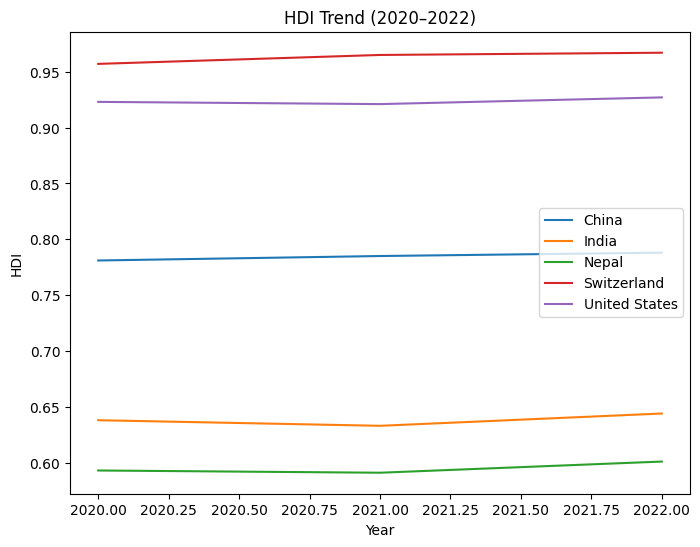

In [438]:
countries = ['Nepal', 'India', 'China', 'United States', 'Switzerland']

subset = hdi_2020_22[hdi_2020_22['country'].isin(countries)]

plt.figure(figsize=(8,6))
sns.lineplot(data=subset, x='year', y='hdi', hue='country')
plt.title("HDI Trend (2020–2022)")
plt.ylabel("HDI")
plt.xlabel("Year")
plt.legend()
plt.show()



Bar Chart – Average HDI by Region

In [480]:
avg_region = {
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',


    'China': 'East Asia & Pacific',
    'Japan': 'East Asia & Pacific',
    'Australia': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific',
    'Indonesia': 'East Asia & Pacific',
    'Philippines': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific',
    'Thailand': 'East Asia & Pacific',

    'Germany': 'Europe & Central Asia',
    'France': 'Europe & Central Asia',
    'United Kingdom': 'Europe & Central Asia',
    'Russia': 'Europe & Central Asia',
    'Italy': 'Europe & Central Asia',
    'Spain': 'Europe & Central Asia',


    'Brazil': 'Latin America & Caribbean',
    'Mexico': 'Latin America & Caribbean',
    'Argentina': 'Latin America & Caribbean',
    'Chile': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean',

    'Nigeria': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',


    'United States': 'North America',
    'Canada': 'North America',


    'Egypt': 'Arab States',
    'Saudi Arabia': 'Arab States',
    'United Arab Emirates': 'Arab States',
    'Jordan': 'Arab States',
}
hdi_problem1B['region'] = hdi_problem1B['country'].map(avg_region)
hdi_region = hdi_problem1B.dropna(subset=['region'])
hdi_region[['country', 'region']].drop_duplicates().head(20)

,country,region
0,Afghanistan,South Asia
18,Argentina,Latin America & Caribbean
24,Australia,East Asia & Pacific
39,Bangladesh,South Asia
57,Bhutan,South Asia
69,Brazil,Latin America & Caribbean
93,Canada,North America
102,Chile,Latin America & Caribbean
105,China,East Asia & Pacific
108,Colombia,Latin America & Caribbean


• B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)

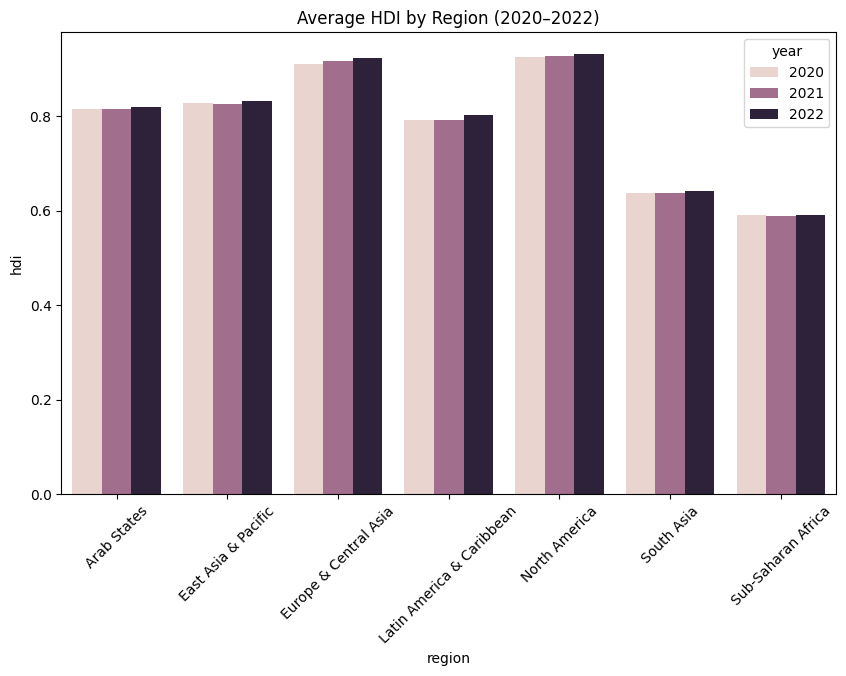

In [440]:
avg_region = hdi_problem1B.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_region, x='region', y='hdi', hue='year')
plt.xticks(rotation=45)
plt.title("Average HDI by Region (2020–2022)")
plt.show()


Box Plot – HDI Distribution

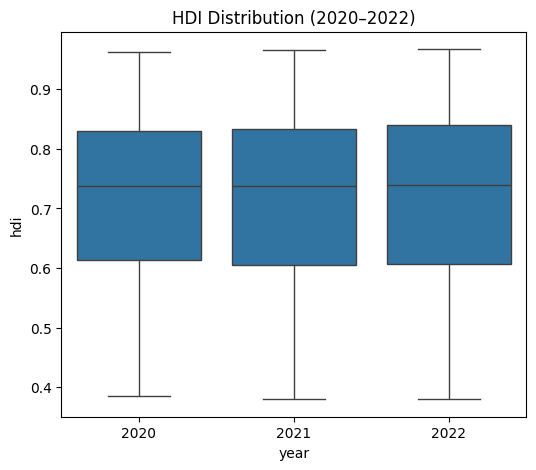

In [441]:
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_2020_22, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


Scatter Plot – HDI vs GNI

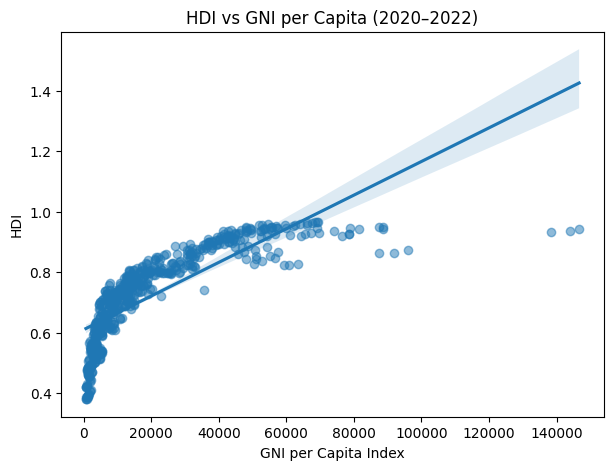

In [442]:
if "gross_inc_percap" in hdi_2020_22.columns:
    plt.figure(figsize=(7,5))
    sns.regplot(
        data=hdi_2020_22,
        x="gross_inc_percap",
        y="hdi",
        scatter_kws={"alpha": 0.5}
    )
    plt.xlabel("GNI per Capita Index")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


• Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.

4. Short Analysis Questions:

• Which countries show the greatest improvement in HDI from 2020 to 2022?

• Did any countries experience a decline in HDI? Provide possible reasons.

• Which region has the highest and lowest average HDI across these three years?

• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI
trends during this period.

Short Analysis Answers:
1. Highest improvement in HDI rankings from
It is believed that the regions with the biggest improvements will be countries such as China, Vietnam, and Bangladesh, among others, that will benefit directly through economic development and improvements in the education and health systems

2. HDI decline

Yes, some countries like Yemen, Syria, and Afghanistan saw a decline due to conflict, political instability, and economic collapse that was further affected by the pandemic.

3. Highest and Lowest Average HDI Regions:

Highest: North America / Europe & Central Asia

Lowest: Sub-Saharan Africa /South Asia 4. Effect of COVID-19 on HDI: There was a temporary backs in health, education, and employment during the pandemic, which slowed down the growth of HDI in 2020-21. However, in 2022, efforts towards a recovery life and vaccination campaigns helped in holding on to, or slightly enhancing, HDI in many nations, further worsening inequalities.

Problem 2
Advanced HDI Exploration

In [443]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the HDI dataset to include only these countries
south_asia_df = df[df['country'].isin(south_asia)].copy() # we did .copy() removes warnings,ensures your new columns (like Composite Score) are safely added

# Save the filtered dataset as a CSV file
south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)


In [444]:
south_asia_df.replace("–", np.nan, inplace=True)

south_asia_df['life_expectancy'] = pd.to_numeric(
    south_asia_df['life_expectancy'], errors='coerce'
)
south_asia_df['gross_inc_percap'] = pd.to_numeric(
    south_asia_df['gross_inc_percap'], errors='coerce'
)

south_asia_df.dropna(
    subset=['life_expectancy', 'gross_inc_percap'],
    inplace=True
)


In [445]:
south_asia_df['Composite Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)


In [446]:
composite_rank = south_asia_df.sort_values(
    by='Composite Score',
    ascending=False
)

# Sorting and showing top 5 countries
south_asia_df.groupby('country')['Composite Score'].mean().sort_values(ascending=False).head(5)


,Composite Score
country,
Maldives,4154.252676
Sri Lanka,2502.612949
Bhutan,1878.321569
Pakistan,1184.282350
India,1151.101140


Plot the top 5 countries in a horizontal bar chart.

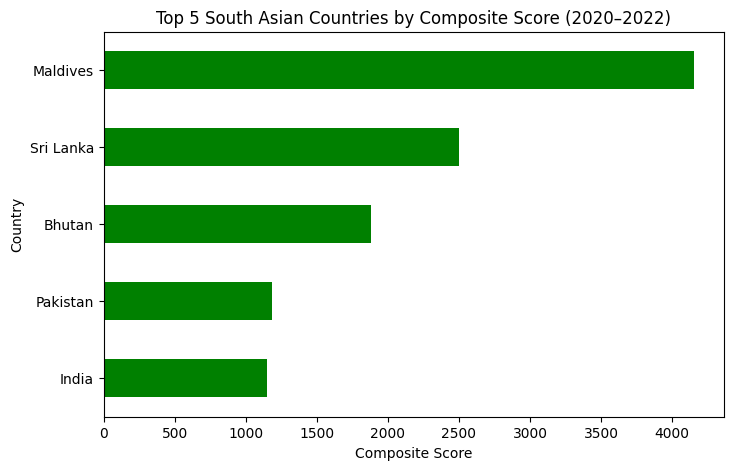

In [447]:
#Composite Score
south_asia_df['Composite Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)

# Computes average Composite Score per country
composite_avg = south_asia_df.groupby('country')['Composite Score'].mean().sort_values(ascending=False)

 #top 5 countries
top5_composite = composite_avg.head(5)

#Plot horizontal bar chart
plt.figure(figsize=(8,5))
top5_composite.plot(kind='barh', color='green')
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score (2020–2022)")
plt.gca().invert_yaxis()  # the highest score is on top
plt.show()

Task 3: Outlier Detection (IQR Method)

In [448]:
sa = south_asia_df.groupby('country')[['hdi', 'gross_inc_percap']].mean()


In [449]:
Q1 = sa['hdi'].quantile(0.25)
Q3 = sa['hdi'].quantile(0.75)
IQR = Q3 - Q1

sa_outliers = sa[
    (sa['hdi'] < Q1 - 1.5 * IQR) |
    (sa['hdi'] > Q3 + 1.5 * IQR)
]

sa_outliers.reset_index()


,country,hdi,gross_inc_percap


Scatter plot: GNI vs HDI (highlight outliers)

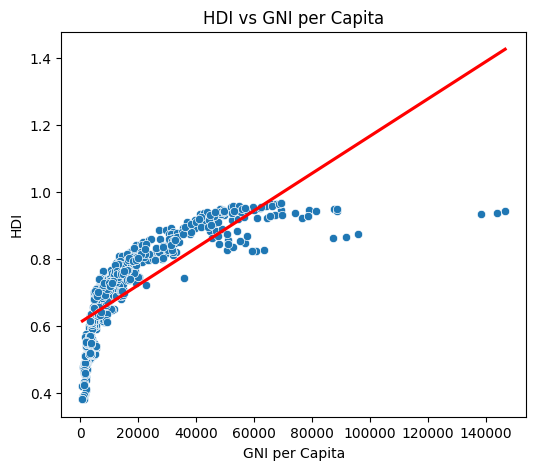

In [450]:
# Scatter Plot: HDI vs GNI per Capita

plt.figure(figsize=(6,5))

# Main scatter plot
sns.scatterplot(data=hdi_2020_22, x='gross_inc_percap', y='hdi')

# Regression line (optional )
sns.regplot(data=hdi_2020_22, x='gross_inc_percap', y='hdi', scatter=False,ci=None,color='red')

# Titles and labels
plt.title('HDI vs GNI per Capita')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')

plt.show()


Task 4: Metric Relationships (Correlation)

In [451]:
gender_corr = hdi_2022_df['gender_development'].corr(hdi_2022_df['hdi'])
life_corr = hdi_2022_df['life_expectancy'].corr(hdi_2022_df['hdi'])

gender_corr, life_corr


(np.float64(0.6157135803096009), np.float64(0.9018938130225121))

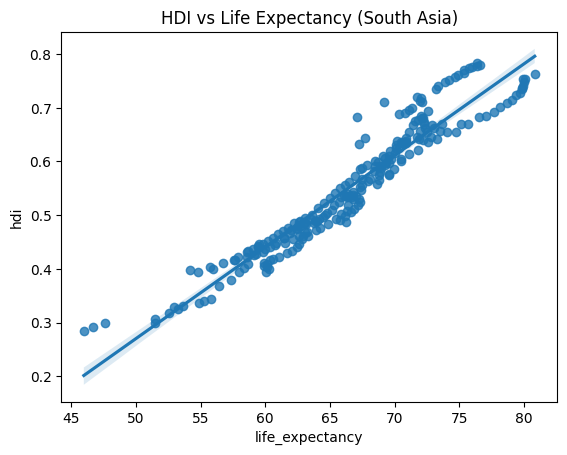

In [452]:
sns.regplot(
    data=south_asia_df,
    x='life_expectancy',
    y='hdi'
)
plt.title("HDI vs Life Expectancy (South Asia)")
plt.show()


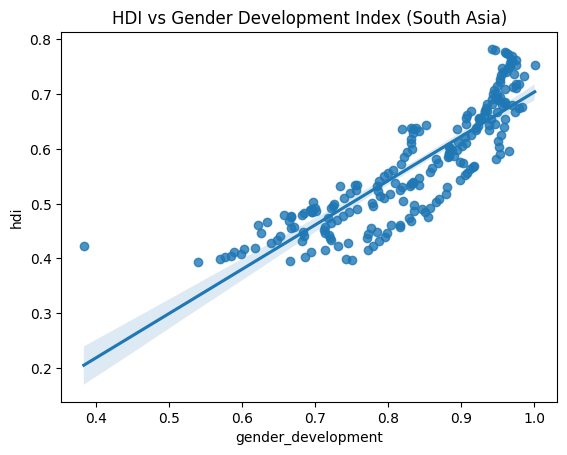

In [453]:
sns.regplot(
    data=south_asia_df,
    x='gender_development',
    y='hdi'
)
plt.title("HDI vs Gender Development Index (South Asia)")
plt.show()


Task 5: GNI–HDI Gap **Analysis**

In [454]:
hdi_2022_df['GNI_HDI_Gap'] = hdi_2022_df['gross_inc_percap'] - hdi_2022_df['hdi']

south_asia_df = hdi_2022_df[hdi_2022_df['country'].isin(south_asia)]
south_asia_sorted_desc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=False)
south_asia_sorted_asc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=True)

south_asia_sorted_desc[['country', 'GNI_HDI_Gap']]



,country,GNI_HDI_Gap
3530,Maldives,18846.030190
3529,Maldives,16856.852460
5476,Sri Lanka,12958.039260
5475,Sri Lanka,12589.029450
3528,Maldives,12330.809320
5477,Sri Lanka,11898.718470
659,Bhutan,10624.192880
658,Bhutan,10240.069710
657,Bhutan,9895.924579
2573,India,6949.882798


Plot top 3 positive & negative gaps

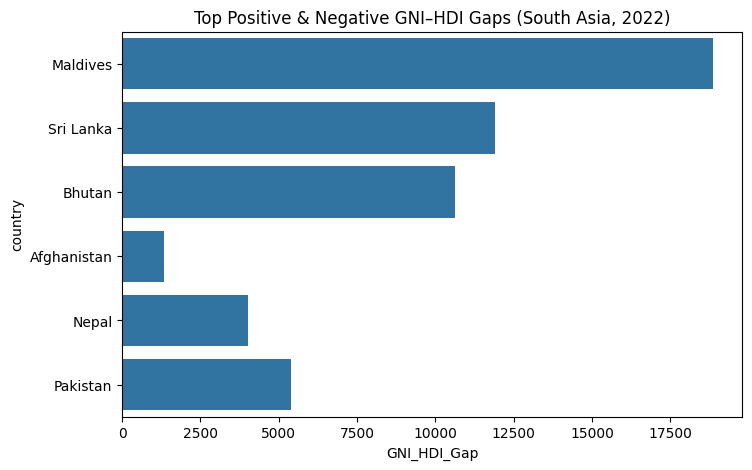

In [479]:
sa_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

top_positive = (
    sa_2022
    .sort_values(by='GNI_HDI_Gap', ascending=False)
    .drop_duplicates(subset='country')
    .head(3)
)

top_negative = (
    sa_2022
    .sort_values(by='GNI_HDI_Gap', ascending=True)
    .drop_duplicates(subset='country')
    .head(3)
)

gap_plot = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8,5))
sns.barplot(
    data=gap_plot,
    x='GNI_HDI_Gap',
    y='country'
)
plt.title("Top Positive & Negative GNI–HDI Gaps (South Asia, 2022)")
plt.show()


PROBLEM 3 – REGIONAL COMPARISON

In [461]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

sa_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(south_asia)
]

me_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(middle_east_countries)
]

sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Task 2: Mean & Standard Deviation of HDI

In [462]:
sa_stats = sa_2020_22['hdi'].agg(['mean', 'std'])
me_stats = me_2020_22['hdi'].agg(['mean', 'std'])

sa_stats, me_stats


(mean    0.639583
 std     0.098273
 Name: hdi, dtype: float64,
 mean    0.788909
 std     0.141295
 Name: hdi, dtype: float64)

Task 3: Top & Bottom Performers

In [463]:
sa_top = sa_2020_22.sort_values(by='hdi', ascending=False).head(3)
sa_bottom = sa_2020_22.sort_values(by='hdi').head(3)

me_top = me_2020_22.sort_values(by='hdi', ascending=False).head(3)
me_bottom = me_2020_22.sort_values(by='hdi').head(3)

compare_tb = pd.concat([sa_top, sa_bottom, me_top, me_bottom])


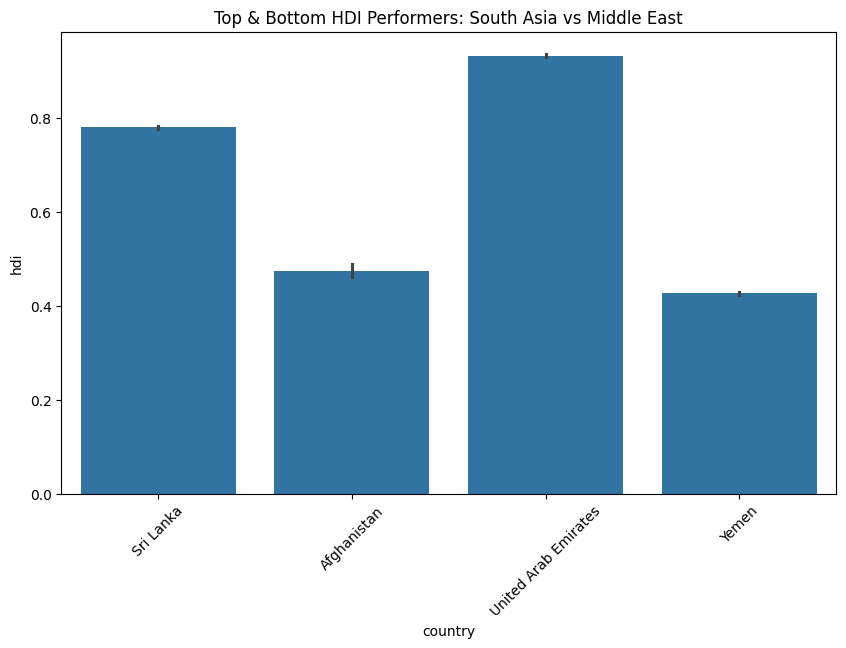

In [464]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=compare_tb,
    x='country',
    y='hdi'
)
plt.xticks(rotation=45)
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.show()


Task 4: Metric Comparisons (Grouped Bar Charts)

In [466]:
sa_metrics = sa_2020_22[[
    'gender_development',
    'life_expectancy',
    'gross_inc_percap'
]].mean()

me_metrics = me_2020_22[[
    'gender_development',
    'life_expectancy',
    'gross_inc_percap'
]].mean()


In [468]:
metric_comparison = pd.DataFrame({
    'Metric': [
        'Gender_Development_Index',
        'Life_Expectancy_Index',
        'GNI_per_Capita_Index'
    ],
    'South Asia': [
        sa_metrics['gender_development'],
        sa_metrics['life_expectancy'],
        sa_metrics['gross_inc_percap']
    ],
    'Middle East': [
        me_metrics['gender_development'],
        me_metrics['life_expectancy'],
        me_metrics['gross_inc_percap']
    ]
})


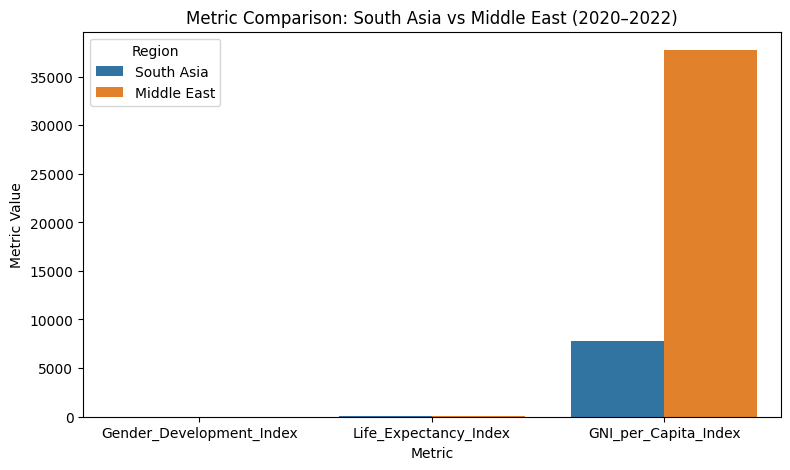

In [469]:
metric_comparison_melted = metric_comparison.melt(
    id_vars='Metric',
    var_name='Region',
    value_name='Value'
)

plt.figure(figsize=(9,5))
sns.barplot(
    data=metric_comparison_melted,
    x='Metric',
    y='Value',
    hue='Region'
)
plt.title("Metric Comparison: South Asia vs Middle East (2020–2022)")
plt.ylabel("Metric Value")
plt.xlabel("Metric")
plt.show()


• Identify which metric shows the greatest disparity between regions.

Task 5: HDI Disparity (Range & CV)

In [470]:
sa_range = sa_2020_22['hdi'].max() - sa_2020_22['hdi'].min()
me_range = me_2020_22['hdi'].max() - me_2020_22['hdi'].min()

sa_cv = sa_2020_22['hdi'].std() / sa_2020_22['hdi'].mean()
me_cv = me_2020_22['hdi'].std() / me_2020_22['hdi'].mean()

print("south asia range :",sa_range)
print("middle east range: ", me_range)
print("South asia cv: " , sa_cv)
print("Middle East cv: ", me_cv)


south asia range : 0.321
middle east range:  0.5130000000000001
South asia cv:  0.1536520924690084
Middle East cv:  0.17910145193048382


• Identify which region exhibits more variation in HDI.

Task 6: Correlation Analysis

In [471]:
# South Asia
sa_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()


,hdi,gender_development,life_expectancy
hdi,1.000000,0.874218,0.938764
gender_development,0.874218,1.000000,0.853780
life_expectancy,0.938764,0.853780,1.000000


In [472]:
# Middle East
me_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr()


,hdi,gender_development,life_expectancy
hdi,1.000000,0.935670,0.933123
gender_development,0.935670,1.000000,0.912836
life_expectancy,0.933123,0.912836,1.000000


Create scatter plots with trendlines for each correlation.

• Interpret the strength and direction of these relationships.

South Asia HDI vs Gender Development

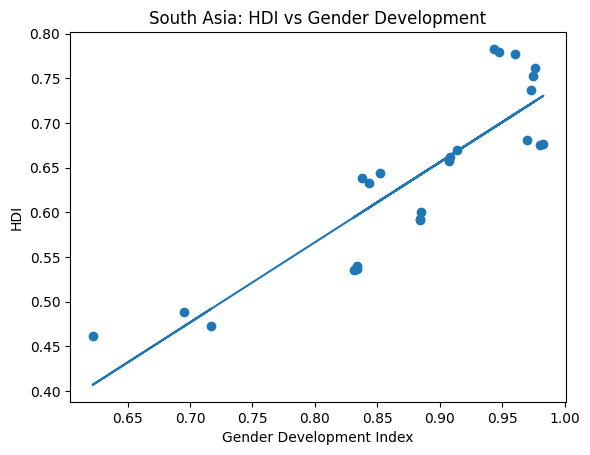

In [473]:
df = south_asia_df[['gender_development', 'hdi']].dropna()

x = df['gender_development']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Gender Development')
plt.show()


South Asia: HDI vs Life Expentency

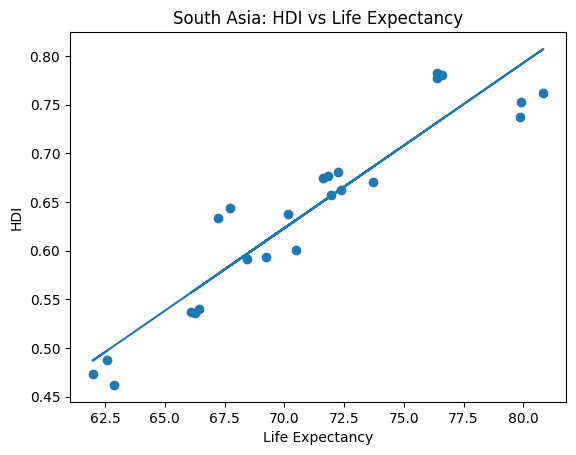

In [474]:
df = south_asia_df[['life_expectancy', 'hdi']].dropna()

x = df['life_expectancy']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Life Expectancy')
plt.show()


Task 7: Outlier Detection (Both Regions)

In [475]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

In [476]:
me_hdi_outliers = detect_outliers(me_2020_22['hdi'])
me_gni_outliers = detect_outliers(me_2020_22['gross_inc_percap'])
sa_hdi_outliers = detect_outliers(sa_2020_22['hdi'])
sa_gni_outliers = detect_outliers(sa_2020_22['gross_inc_percap'])

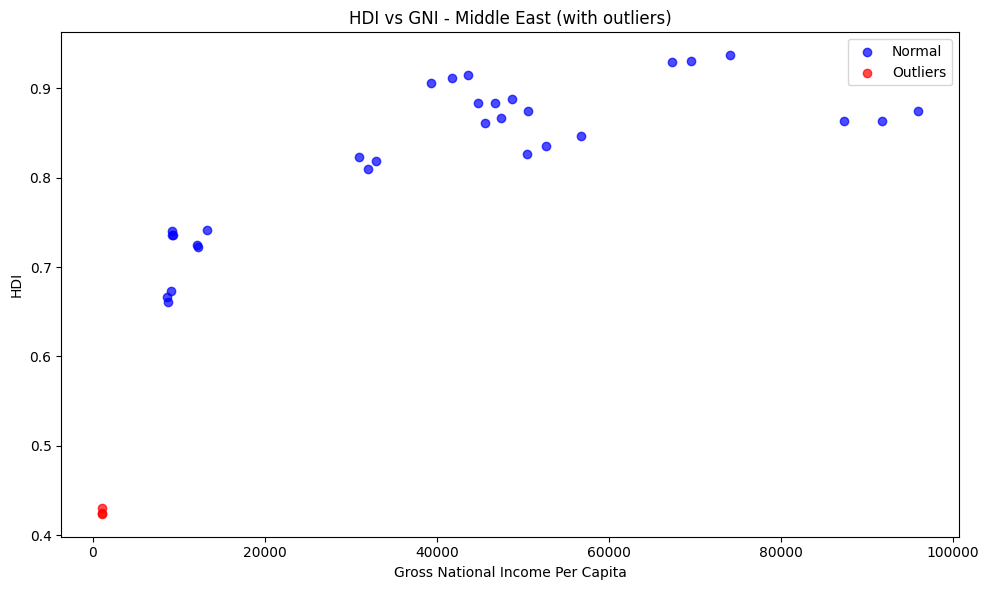

In [478]:
# Plot for Middle East
plt.figure(figsize=(10, 6))
plt.scatter(me_2020_22[~me_hdi_outliers]['gross_inc_percap'], me_2020_22[~me_hdi_outliers]['hdi'],
           alpha=0.7, label='Normal', c='blue')
plt.scatter(me_2020_22[me_hdi_outliers]['gross_inc_percap'], me_2020_22[me_hdi_outliers]['hdi'],
           alpha=0.7, label='Outliers', c='red')
plt.title('HDI vs GNI - Middle East (with outliers)')
plt.xlabel('Gross National Income Per Capita')
plt.ylabel('HDI')
plt.legend()
plt.tight_layout()
plt.show()

For southAsia

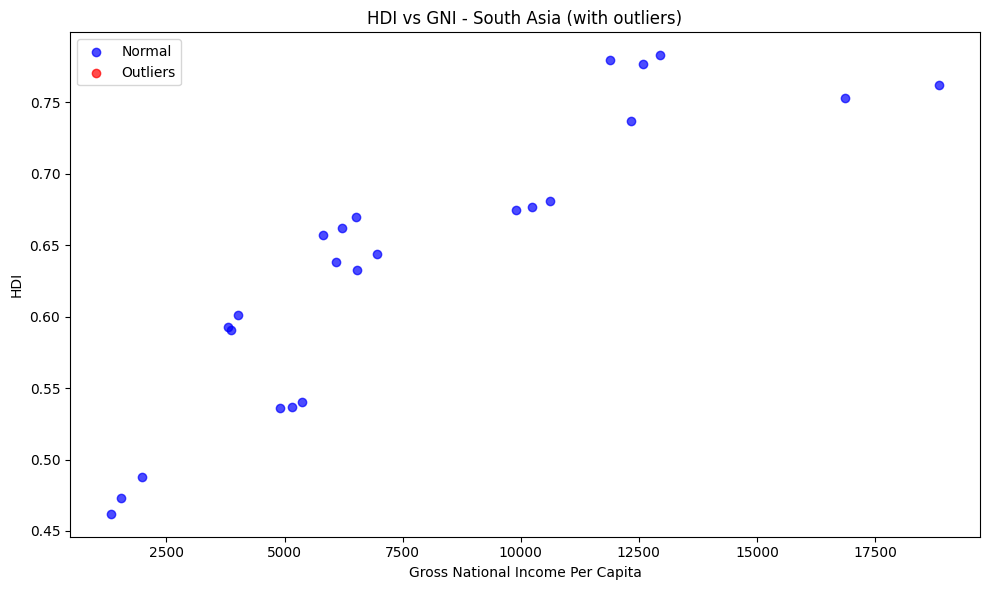

In [477]:
# Plot for South Asia
plt.figure(figsize=(10, 6))
plt.scatter(sa_2020_22[~sa_hdi_outliers]['gross_inc_percap'], sa_2020_22[~sa_hdi_outliers]['hdi'],
           alpha=0.7, label='Normal', c='blue')
plt.scatter(sa_2020_22[sa_hdi_outliers]['gross_inc_percap'], sa_2020_22[sa_hdi_outliers]['hdi'],
           alpha=0.7, label='Outliers', c='red')
plt.title('HDI vs GNI - South Asia (with outliers)')
plt.xlabel('Gross National Income Per Capita')
plt.ylabel('HDI')
plt.legend()
plt.tight_layout()
plt.show()

• Discuss the significance of these outliers.